# Step 1 – Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Step 2 – Load the Cleaned Dataset

In [3]:
file_path = 'Cleaned_fitness_classes_data.csv'  # Make sure this is the correct path
df = pd.read_csv(file_path)

# Quick check of the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Site_ID               3271 non-null   object 
 1   Class_Name            3271 non-null   object 
 2   End_Date              3271 non-null   object 
 3   Start_Time            3271 non-null   object 
 4   Capacity              3271 non-null   int64  
 5   Booked                3271 non-null   int64  
 6   Price_INR             3271 non-null   float64
 7   End_DateTime          3271 non-null   object 
 8   Weekday               3271 non-null   object 
 9   Hour                  3271 non-null   int64  
 10  Capacity_Utilization  3271 non-null   float64
 11  Revenue               3271 non-null   float64
 12  MaxBookes             3271 non-null   int64  
 13  Dataset               3271 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 357.9+ KB
None
  Site_I

## Step 3 – Prepare the Data
 We model attendance (Booked) based on price (Price_INR)

In [4]:
# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Booked', 'Price_INR'])

In [5]:
# Select independent and dependent variables
X = df[['Price_INR']]
y = df['Booked']

In [6]:
# Add constant term for intercept
X = sm.add_constant(X)

# Step 4 – Build the Price Elasticity Model using OLS

In [7]:
model = sm.OLS(y, X).fit()

# Step 5 – Print Model Summary

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Booked   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     123.9
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           2.79e-28
Time:                        15:27:17   Log-Likelihood:                -11949.
No. Observations:                3271   AIC:                         2.390e+04
Df Residuals:                    3269   BIC:                         2.391e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.3767      0.415     51.473      0.0

# Step 6 – Predict Attendance and Evaluate Model

In [9]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 87.20800799968214
R-squared: 0.03652729179525027


# Step 7 – Plot Actual vs Predicted Attendance

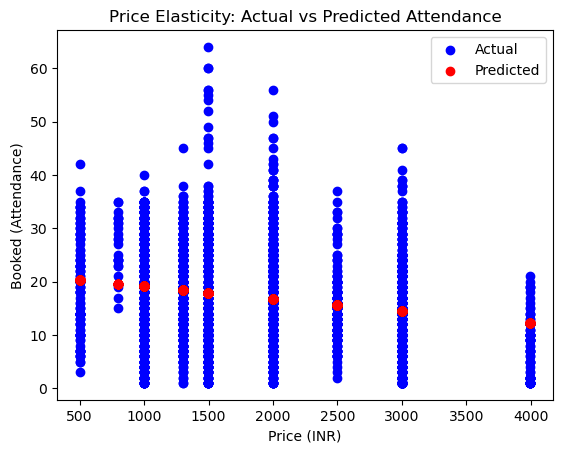

In [10]:
plt.scatter(df['Price_INR'], df['Booked'], color='blue', label='Actual')
plt.scatter(df['Price_INR'], y_pred, color='red', label='Predicted')
plt.xlabel('Price (INR)')
plt.ylabel('Booked (Attendance)')
plt.title('Price Elasticity: Actual vs Predicted Attendance')
plt.legend()
plt.show()

# Step 8 – Interpret Elasticity

In [11]:
price_coeff = model.params['Price_INR']
print(f'Elasticity Estimate (Coefficient of Price_INR): {price_coeff}')

if price_coeff < 0:
    print("As expected, attendance decreases with higher prices.")
else:
    print("Unexpected result: attendance increases with price — further investigation needed.")

Elasticity Estimate (Coefficient of Price_INR): -0.0022943488143660467
As expected, attendance decreases with higher prices.
